In [2]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Напишем функцию для подсчёта и интерпретации АВ-теста
def test_calc(r1, r2, alpha = 0.05):
    
    s,p = ttest_ind(r1,r2)
    
    if p < alpha:
        print("Средние не равны")
    else:
        print("Средние равны")
    
    print("Среднее значение 1 ряда", r1.mean()*100)
    print("Среднее значение 2 ряда", r2.mean()*100)
    print("Разница средних = ", (r1.mean()-r2.mean())*100)
    print("P_value = ",p)
    print("S = ",s)
    return s, p

In [4]:
# Проверим систему сплитования по последнему знаку id клиента
df = pd.read_csv('Домашнее задание Бизнес-4 (исходник).csv', sep=';')
df['right_symbol'] = df['id_client'].astype(str).str[-1]
df['right_symbol'] = df['right_symbol'].astype (int)
df.groupby('right_symbol')['flag_conv'].mean()*100 # Посмотрим конверсии по последнему символу идентификатора
df

,id_client,flag_conv,right_symbol
0,1345321,0,1
1,1345322,0,2
2,1345330,0,0
3,1345338,1,8
4,1345342,0,2
...,...,...,...
3164,1361073,1,3
3165,1361074,1,4
3166,1361082,1,2
3167,1361083,1,3


<Axes: xlabel='right_symbol', ylabel='flag_conv'>

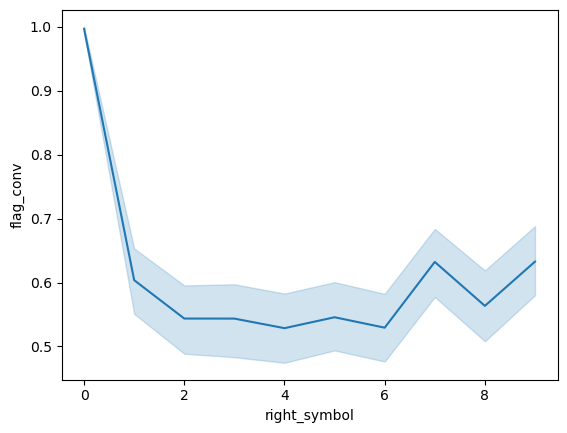

In [5]:
# Визуализируем конверсию при сплитовании по последнему символу
sns.lineplot(x = df['right_symbol'], y = df['flag_conv'])

In [6]:
# В группе 0 явный перевес, такая система сплитования нам не подходит, результаты не объективны

In [7]:
# Посмотрим на группы по последнему знаку идентификатора
df_10 = df.copy() # Группы по остатку деления на 10
df_10['group'] = np.where(df['id_client'] % 10 >= 5, 'control', 'test') # От 0 до 5 контроль, 6-9 - тест

df_2 = df.copy() # Группы по остатку деления на 2
df_2['group'] = np.where(df['id_client'] % 2 > 0, 'control', 'test') # Нечётные контроль, чётные тест

print('АА-тест для групп по остатку деления на 10')
test_calc(df_10[df_10['group']=='control']['flag_conv'],df_10[df_10['group']=='test']['flag_conv'])

print('========================================')
print('АА-тест для групп по остатку деления на 2')
test_calc(df_2[df_2['group']=='control']['flag_conv'],df_2[df_2['group']=='test']['flag_conv'])

АА-тест для групп по остатку деления на 10
Средние не равны
Среднее значение 1 ряда 57.98632691112492
Среднее значение 2 ряда 64.48717948717949
Разница средних =  -6.500852576054572
P_value =  0.00017195329628373794
S =  -3.761500955083385
АА-тест для групп по остатку деления на 2
Средние не равны
Среднее значение 1 ряда 59.19140871762476
Среднее значение 2 ряда 63.17780580075662
Разница средних =  -3.986397083131865
P_value =  0.021306090686166332
S =  -2.303661902563631


(-2.303661902563631, 0.021306090686166332)

In [8]:
# Система сплитования по остатку деления на 10 и на 2 нам тоже не подходит, в группах наблюдается явный перевес

In [10]:
# Проведём АА-тест 1000 раз
df_aa = pd.DataFrame(columns=['iter','stat_crit','p_value'])

for i in range(1,1000):
    part_50 = df.sample(frac = 0.5)
    rest_part_50 = df.drop(part_50.index)

    s_a, p_a = ttest_ind(part_50['flag_conv'], rest_part_50['flag_conv'])
    
    df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)

df_aa[df_aa['p_value']<=0.05].count() /df_aa.count()


C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be remove

C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be remove

C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be remove

C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be remove

C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be remove

C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\MrEdward\AppData\Local\Temp\ipykernel_5620\46920216.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)


iter         0.05005
stat_crit    0.05005
p_value      0.05005
dtype: float64

In [ ]:
# АА-тест показал, что группы имеют нормальное распределение и система сплитования по хэшу нам в данном случае подойдёт
# Доля выборки соответствующая ошибке первого рода близка к критерию приемлемости 5%

In [16]:
# Посчитаем количество наблюдений, необходимых для проведения АБ-теста при MDE = 2%
m = df['flag_conv'].mean()
sigma = m*(1-m) # Посчитаем дисперсию
mde = 0.02 # Обозначим интересующий MDE
iterations = sigma * 16 / (mde**2) # Посчитаем количество наблюдений
print('Необходимо', int(round(iterations, 0)), 'наблюдений в минимальной группе')

Необходимо 9499 наблюдений в минимальной группе
